<a href="https://colab.research.google.com/github/Blueprint-GitHub/Study_Note/blob/main/Machine_Learning_Engineering_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3. Feature Engineering**

### **0. What is Good Feature?**

In [ ]:
1. 높은 예측력
  - 좋은 특성은 예측력이 높아야 한다. 만약 환자에게 암이 있는지 여부를 예측하고 싶을때 데이터 셋에 그 환자가
    무슨 자동차를 타는지나 결혼을 했는지의 여부와 같은 특성 암에 대한 좋은 예측 변수가 아니므로, 암의 예측에
    유의미한 정보를 제공하지 못할 가능성이 높다. 물론 문제가 달라진다면 이 예측 변수들이 높은 예측력을 가질 수도 있지만,
    해결하고자 하는 문제에 가장 관련이 깊고 유용한 특성을 선택하는 것이 중요하다.

2. 빠른 계산 능력
  - 좋은 특성은 빠르게 계산할 수 있어야 한다. 만약 데이터 셋이 작고 희소 벡터를 가지고 있을 경우(예:Bow)
    학습 알고리즘이 희소 벡터의 패턴을 찾아내기 어려울 것이다. 이러한 희소 벡터를 증강하기 위해 위키피디아 API와
    같은 외부 서비스를 사용한다면, 응답 시간으로 인해 계산 시간이 길어질 수 있는데 특히 실시간 시스템에서는
    예측력이 소폭 저하되더라도 빠른 응답 시간이 중요할 수 있기 때문에 이러한 방법이 적합하지 않을 수 있다.

3. 신뢰성
  - 좋은 특성은 신뢰할 수 있어야 한다. 만약 지속적으로 제공받을 수 없는 특성이거나 일관적으로 수집이 불가능한 경우
    그러한 특성은 모델의 예측 품질을 저하시키고 때로는 완전히 잘못된 예측을 하게 만들수도 있다.

4. 비상관성
  - 두 특성의 상관관계(correlation)은 두 값이 서로 연관되어 있음을 의미한다. 모델이 운영 환경에 배포되고 나면
    시간이 지남에 따라 입력 데이터가 조금씩 변화할 수 있는데, 이때 많은 특징이 서로 높은 상관관계에 있는 경우
    입력 데이터가 조금만 변해도 모델 동작이 크게 바뀔 수 있다.

5. 기타 특성
  - 좋은 특성을 가름하는 가장 중요한 성질은 훈련 세트의 특성 분포가 운영 환경에서의 분포와 유사해야 한다는 것이다.
    만약에 10년전 데이터 셋을 가지고 시계열 모델을 훈련했다면 당연히 오늘날에는 잘 작동하지 않을 것이다.
    또한 특성은 단일하고 이해하기 쉽고 유지보수가 쉽도록 설계해야 한다. 예를 들어, 자동차의 특성에 따라 자동차 유형을
    분류할 때 무게, 길이, 너비, 색상은 단일한 특성이지만 '길이를 무게로 나눈 값'은 단일하지 않다.
    이러한 특성 공학은 모델의 성능을 올리는데 도움이 되지만 이러한 과정은 학습 파이프라인에서 설계하는 것이 좋다.

6. 창의력 활용
  - 데이터 분석가는 예측 모델에 적합한 특성을 결정할 수 있는 가장 좋은 위치에 있다.
    따라서 학습 알고리즘의 입장에서 어떤 특성이 가장 유효할지 창의력을 최대한 발휘해야 한다.
    예를 들어 중요도에 따라 이메일을 분류한다고 가정할때 매달 첫 번째 월요일에 정부기관에서 중요한 메일이 자주 온다면
    '정부 첫째 월요일'특성을 만들수 있으며, 이모티콘이 3개 이상 있는 이메일은 거의 중요하지 않다고 판단되면
    '이모티콘 많음' 특성을 만들어서 0과 1로 구분할 수 있다.

### **1. 텍스트에 대한 특성 공학**

In [ ]:
1. One-Hot Encoding # sklearn.preprocessing.OneHotEncode
  - 원-핫 인코딩은 범주형 속성을 여러 이진 속성으로 변환하는 방법으로 범주형 특성의 서로 다른 범주 개수만큼
    희소 벡터를 생성해 그 범주는 1로 나머지는 0으로 채워넣어 이진 벡터로 표현한다.
    {빨강, 파랑, 초록} -> [1, 0, 0], [0, 1, 0], [0, 0, 1]

2. Bag-of-words # sklearn.feature_extraction.text.CountVectorizer
  - Bow는 원-핫 인코딩 기법을 일반화해서 텍스트 데이터에 적용한 것으로 텍스트의 단어들을 토큰이라는 조각으로 분할하여
    각 토큰에 고유한 색인(번호)를 할당한다. 그러면 텍스트로 된 문장을 어휘 사전(vocabulary)길이의 희소 벡터로 변환할 수 있다.
    희소 벡터의 표현을 그 단어가 있냐없냐의 이진값으로 나타낼 수도 있지만, 토큰 수(Count Encoding)나 토큰 빈도,
    TF-IDF(빈도-역문서 빈도; 자주 등장하는 단어의 가중치를 줄여준다)와 같은 형식으로도 표현할 수 있다.

3. bag-of-n-grams # sklearn.feature_extraction.text.CountVectorizer(ngram_range = n)
  - Bow에 n-garm을 적용해 더욱 확장할 수 있는데 이렇게 하면 모델이 더욱 정교한 표현을 학습할 수 있게 되지만
    더 희소한 특성 벡터가 만들어진다는 단점이 있다. n-gram은 여러 단어로 구성된 토큰으로 분할하는 방법으로
    I am your father 라는 문장을 [I am, am your, your father]와 같이 2-gram(bigrams)으로 분할할 수 있다.

4. Mean Encoding (Target Encoding) # category_encoders.target_encoder.TargetEncoder
  - 범주형 특성에 대한 레이블값의 평균으로 범주형 특성을 대체하는 방법. 데이터 차원이 증가하지 않고 레이블에 대한
    일부 정보가 포함된다는 장점이 있다. (훈련 데이터에서 계산한 평균값을 사용하지 않으면 데이터 누수가 발생할 수 있다.)
    샘플 수가 적은 범주에서 과적합의 위험이 있으며 평균값 계산 시 정규화나 스무딩 기법을 사용 가능하다.

5. Odds Ratio
  - 승산비(Odds ratio)는 일반적으로 두 사건 A와 B 사이의 연관 강도를 정량화하는 통계로. 승산비가 1인 경우
    두 사건은 독립적이라고 판단할 수 있다. 승산비는 매우 낮거나(0에 가깝게) 매우 크게 (100 이상) 나타날 수 있으며
    이러한 수치적 오버플로를 방지하기 위해 종종 로그 승산비를 적용 할 수 있으며. 범주형 특성 이렇게 산출된 승산비
    값으로 대체하여 사용할 수 있다.

6. Ordinal Scaling
  - 때로는 범주형 특징에 순서는 있지만 각 특징간 비율이 다를 수 있다. 예를 들면 학교 성적(A에서 E까지)나
    연공서열 수준(하급, 중급, 상급)처럼 일부 값이 더 멀리 떨어져야 하는 경우 하급,중급,상급을 1/5, 2/5, 1 등으로
    사용할 수 있다. 이러한 경우는 적절한 도메인 지식이 필요하며 각 범주의 실제 가치를 반영하는 적절한 스케일을 선택해야 한다.

7. 사인-코사인 변환
  - 범주형 특성에 주기성이 있는 경우에는 정수 인코딩이 제대로 작동하지 않는다. 예를 들어 요일을 OrdinalEncoder로 변환해
    1~7로 나타내면 월요일(1)과 일요일(7)의 차이는 6이지만 각 요일의 차이는 1이어야 한다. 따라서 이 대신에
    사인-코사인 변환을 적용해 각 요일 간 간격이 동일하게 만들 수 있다.

8. Feature Hashing #MurmurHash3, Jenkins, CityHash, MD5
  - 특성 해싱 혹은 해싱 트릭은 텍스트 데이터가 값이 많은 범주형 속성을 임의 차원의 특성 벡터로 변환한다.
    만약 텍스트 문서 모음에 100만개의 고유한 토큰이 있다면 계산 비용이 많이 들 수 있는데, 특성 해싱을 적용하면
    각 특성에 대해 해시 함수를 적용하여 고정된 크기의 벡터에서의 인덱스를 바로바로 계산할 수 있게 되므로
    메모리를 효율적으로 사용할 수 있고 병렬 처리가 용이해지며 학습 변환 과정이 단순해지는 장점이 있다.
    그러나 인덱스를 저장할 특성 벡터의 크기가 작을 경우 서로 다른 특성이 같은 인덱스에 할당되는 충돌이 발생할 수 있는데
    해시 공간을 충분히 크게 하여 충돌을 최소화할 수 있지만 학습속도가 느려질 수 있다.

9. 주제 모델링(LSA, LDA) # sklearn.decomposition.TruncatedSVD, LatentDirichletAllocation
  - 일반적으로 주제 모델링은 자연어 텍스트 문서 형태의 레이블링되지 않은 데이터를 사용하는 기술로 문서를 주제를 나타내는
    벡터로 표현하는 방법을 배운다. 주제 모델링에는 잠재 의미 분석(Latent Semantic Analysis, LSA)과
    잠재 디리클레 할당(Latent Dirichlet Allocation,LDA)과 같은 알고리즘이 있는데 LSA는 Bow나 TF-IDF 벡터를 입력으로 받아
    특잇값 분해(Signlar Value Decomposition, SVD)를 통해 중요한 구조를 포착하는 반면 LDA는 문서가 여러 개의 주제로
    구성되어 있다고 가정하고 계층적 베이지안 모델을 기반으로 각 문서의 주제 분포와 주제 내의 단어 분포를 학습한다.

10. NMF (Non-negative Matrix Factorization) # sklearn.decomposition.NMF
  - NMF는 복잡한 데이터를 더 이해하기 쉬운 두 개의 행렬로 분해하여 데이터를 더 간단하게 파악할 수 있게 해주는 도구로
    원본 행렬을 분해한다. 만약 영화A,B,C에 대한 고객들의 별점 데이터 셋이 있을때 NMF를 통해 영화의 장르(특성 행렬)와
    고객의 장르 선호도(계수 행렬)로 나눌 수 있다.

11. 특성 쌓기
  1) 특성 쌓기는 기존의 데이터 포인트 주변의 정보를 추가적으로 통합하여 텍스트나 시계열 데이터의 문맥을 포착하는 기법이다.
     예를 들어, 텍스트 데이터에서 특정 단어의 앞뒤에 위치한 단어들을 이용하거나, 시계열 데이터에서 주변의 시점들을 추가로
     고려하여 데이터의 특성 벡터를 확장한다. 이는 특히 문맥이 중요한 자연어 처리나 시계열 예측에서 유용하며,
     모델이 더 복잡한 패턴과 의미를 이해할 수 있도록 돕는다. 하지만 이 방법을 사용할 때는 추가적인 특성으로 인한
     계산 복잡성과 데이터의 차원 증가를 고려해야 하며, PCA와 같은 차원 축소 기법을 사용하여 효율성과 성능을 유지해야 한다.

### **2. 시계열 데이터**

In [ ]:
1. 일반적으로 시계열 데이터로는 아래의 두 가지 종류의 예측 문제를 해결한다.
  1) 지난 7일 동안의 주가를 보고 내일 주가를 예측하는 것 처럼 다음에 관찰할 수 있는 무언가를 예측.
  2) 사용자의 시스템 로그를 참고해 이번 분기에 구독을 취소할 가능성이 있는지 등의 여부를 예측하는 것 처럼
     해당 시퀀스를 생성한 현상에 대해 예측.

2. 시계열 데이터(time-series data)는 전통적인 지도학습 데이터와 달리 타임스탬프, 날짜, 월-연도와 같은 시간 속성을 포함한다.
   기존 시계열 데이터(classical time-series data)는 분당 1회, 시간당 1회 등과 같이 시간에 따라 균등한 간격으로 관측되지만
   한 시간에 다섯 번, 하루에 세 번 등과 같이 비정기적(불규칙)으로 관측되는 데이터도 있을 수 있는데,
   이를 점 프로세스(dot process) 또는 이벤트 스트림(event stream)이라고 한다. 이러한 이벤트 스트림을 처리하지 않고
   작업할 수도 있지만, 평균을 내는 등의 방법으로 classical하게 변환하면 더 쉽게 특성 공학을 수행할 수 있다.

3. 시계열 데이터를 딥러닝 모델에 적용하기 위해서는 다음 두 가지를 결정해야 한다.
  1) 정확한 예측에 필요한 연속된 관측값의 개수(Prediction window)
  2) 관찰한 시퀀스를 고정 차원 특성 벡터로 변환하는 방법

  이 두 가지는 경험에 의해 결정되거나 하이퍼파라미터 튜닝으로 결정되는데, 이 외에도 아래와 같은 효과적인 방법이 존재한다.
  1) 전체 시계열을 길이 w의 세그먼트로 나눈다.
  2) 각 세그먼트 s에서 훈련 샘플 e를 만든다.
  3. 각 e에 대해 s의 관측값에 대한 다양한 통계를 만든다.(평균,중앙값,표준 편차, 절대 편차 중앙값
                                                         사분위수 범위, 특잇값, 증가 여부 등)

### **3. 특성 선택**

In [ ]:
1. 긴 꼬리 자르기
  - 어떤 분포에서 긴 꼬리는 가장 많은 계수를 차지하는 소수의 그룹에 비해 계수가 훨씬 적은 요소가 분포하는 부분이다.
    예를 들어 텍스트 데이터에서 am, and, is와 같은 단어들은 매우 많겠지만 zambia, nudge와 같은 단어들은 몇 개 없을 것이다.
    이때 소수 그룹을 분포의 머리라고 하는데, 이 그룹은 전체 데이터의 절반 이상을 차지한다.
    긴 꼬리를 잘라야 하는지, 그리고 어디를 임계값으로 정할지는 다소 주관적이고 논란의 여지가 있는 부분이다.
    왜냐하면 많은 클래스 분류 문제에서 드물게 등장하는 한 단어가 중요한 역할을 할 수 있기 때문이다.
    그럼에도 불구하고 긴 꼬리 부분에 속하는 특징을 제거하면 학습 속도가 빨라지고 모델이 향상되는 경우가 많다.

2. 보루타
  - 보루타(Boruta)는 Kaggle 대회에서 사용되는 인기는 도구로 랜덤 포레스트 모델을 반복적으로 훈련하고 통계 테스트를 사용해
    중요한 특징과 중요하지 않은 특징을 구분하는 기술이다. 원본 특성에 약간의 변형을 가해 복제 특성을 만든 뒤, 그 복제 특성의
    특성 중요도와 원본 특성의 특성 중요도를 비교하는 과정을 반복하며 실제로 타겟값 예측에 효과가 있는 특성들을 가려내며
    성능에 대한 이론적인 보장은 없지만(휴리스틱하지만) 실제로는 잘 작동하므로 자주 사용되고 있다.

3. L1-정규화(L1-regularization)
  -  L1 정규화는 대부분의 매개변수가 0인 희소 모델을 생성해 암묵적으로 특성 선택을 수행하는 정규화 방법으로,
     복잡한 데이터셋에 사용하면 중요하지 않은 특성의 기여도를 낮춰 모델이 전체적으로 일반화되게 하는 효과를 가진다.

4. 과제별 특성 선택
  - 데이터셋이나 목표에 따라 다양한 방법으로 특성 선택을 해야 하는데, 수치형 특성에 대해서는 위에서 설명한 기법들을 사용하면
    되지만 자연어 텍스트의 특성 선택을 수행하고자 한다면 불용어(stop word, 너무 흔해서 의미가 없는 단어)나 자주 사용하지 않는
    단어들을 RARE_WORD와 같은 합성 토큰으로 대체하는 방법등을 고려해볼 수 있다.

### **4. 특성 합성**

In [ ]:
1. 특성 이산화
  - 다양한 연령대의 사람들을 10대, 20대, 50대 등으로 묶어 범주형 특성으로 처리하는 특성 이산화는 많은 경우에 모델의
    예측 정확도를 향상시키고, 모델의 해석을 용이하게 한다는 점에서 자주 사용된다.
    Bucketing이라고도 하는 Binning은 특정 범위의 수치형 데이터를 일정한 범주형 값으로 변환하는 기술로 일반적인 접근 방식
    으로는 균일한 비닝, k-평균 기반 비닝, 분위수 기반 비닝이 있다. 이렇게 변환한 데이터는 전처리가 필요 없는 트리 모델에서는
    바로 사용할 수 있지만 딥러닝 모델 등에서 사용한다면 원-핫 인코딩을 통해 다시 수치형 데이터로 변환해 사용해야 하며
    너무 많은 범주로 이산화하거나 너무 적게 하는 경우 과적합, 정보 손실등의 문제가 발생할 수 있으므로 유의해야 한다.

2. 관계형 데이터에서 특성 합성
  - 예를 들어 사용자, 주문, 호출의 세 가지 테이블이 있을때 이 세 개의 테이블을 어떤 기준에 의해(예 : 사용자 ID) 하나로
    합치는 방법을 관계형 데이터베이스의 특성 합성이라고 말하며, 이때 각 특성 간의 다양한 통계량을 특성으로 사용해 모델에
    더 많은 정보를 제공할 수 있다. 일반적으로 사용되는 통계량은 곱셈, 평균과 표준 편차와 같은 것들이며, 통계의 통계같은
    더 깊은 구조를 만들어 사용할 수도 있다.

3. 데이터로부터 특성 합성
  - 여러 개의 특성을 합성하는 데 사용하는 일반적인 기술은 k-평균 군집화다. 분류 모델의 경우 k값은 보통 클래스 수 C를
    사용하며 회귀의 경우에는 엘보우 방법이나 실루엣 점수등으로 적절한 k값을 결정한다. 그 후 훈련 데이터셋에 k-평균 군집화를
    적용하고 여러 새로운 특성들을 추가하면서 군집에 속하는 특성인지 아닌지(이진값)를 판단해 특성을 합성할 수 있다.
    이러한 방법을 사용하면 데이터의 차원과 노이즈가 감소하고, 해석 가능성이 향상된다는 장점이 있으며 이 외에도 DBSCAN, PCA,
    t-SNE, 오토인코더와 같은다양한 방법들이 존재한다.

4. 다른 특성으로부터 특성 합성
  - 신경망 유닛은 여러 특징들을 교묘하게 결합하는 방법을 배울 수 있는데, 이러한 특징을 활용하면 얕은 학습 알고리즘에 풍부한
    특성을 제공해 모델의 성능을 높일 수 있다. 기존 특성에서 새로운 특성을 얻을 수 있는 가장 일반적인 방법은 특징 이산화,
    특성 교차(+, -, *, /)등을 통해 여러 개의 특성을 생성하고, 특성 선택 방법을 통해 모델의 품질을 높이는 방법을 사용한다.

### **5. 데이터를 통한 특성 학습**

In [ ]:
때로는 데이터에서 유용한 특성을 학습할 수 있는데, 텍스트 말뭉치나 웹의 이미지 모음과 같이 레이블링되어 있거나 레이블이 없는
대규모 관련 데이터 모음을 사용할 수 있을때 특히 효과적이다.

1. 단어 임베딩(word embedding)
  - 데이터 셋에서 단어 임베딩을 학습하는 알고리즘 중 가장 널리 사용되는 알고리즘은 구글의 Word2Vec으로
    두 가지 주요 알고리즘을 사용해 텍스트 데이터 셋을 단어 임베딩으로 변환한다.
    1) Skip-gram : 문장의 특정 단어가 주어지면 그 단어에 대한 주변 단어를 예측하는 알고리즘으로 드문 단어나 구절에 대해서도
                   강력한 임베딩을 생성할 수 있다.
    2) CBOW(Continuous Bag of Words) : 특정 문장(문맥) 으로부터 목표 단어를 예측하는 알고리즘으로 학습 속도가 빠르고
                                       자주 등장하는 단어에 대해 효과적인 임베딩을 생성할 수 있다.
    word2vec을 사용해 훈련한 단어 임베딩은 단어 임베딩 세트가 고정되어 있어서 훈련할때 사용한 말뭉치에 없는 단어에는
    적용할 수 없다는 단점이 있는데 각 단어에 대한 벡터를 학습하는 Word2vec과 달리 각 단어를 해당 단어를 구성하는
    문자 n-그램의 임베딩 벡터의 평균으로 생각하는fastText 알고리즘을 활용하면 훈련에 사용하지 않은 모든 단어에 대한 임베딩을
    얻을 수 있다.

2. 문서 임베딩(document embedding)
  - 문장인 전체 문서에 대한 인기있는 임베딩 알고리즘은 doc2vec 알고리즘으로 word2vec의 구조와 매우 유사하지만
    단어 임베딩만 있는 word2vec과 달리 문서 임베딩은 문서ID 에 대한 임베딩 벡터도 추가로 생성하는데,
    이러한 방식을 사용해 문서와 문서간의 유사도를 계산하거나 문서 벡터와 단어 벡터도 비교할 수 있다는 장점이 있다.

3. 모든 객체에 대한 임베딩
  - 모든 객체애 대한 임베딩 벡터를 얻는 데 사용하는 일반적인 방법은 다음과 같다.
  1) 입력 객체를 예측하기 위한 지도학습 문제를 정의하고 신경망 모델을 훈련한다.
  2) 신경망 모델의 출력층 앞단의 Dense층 중 하나의 출력을 입력 객체의 임베딩으로 사용한다.
  예를 들어 이미지 데이터 셋의 Flatten -> CNN -> Dense -> Output 구조의 Dense층을 임베딩으로 활용하는 것이다.
  임베딩 차원은 실험이나 경험을 통해 결정하지만 보통 범주의 개수^(1/4) 혹은 50에서 600 사이의 값을 사용한다.
  혹은 임베딩 차원 자체를 하이퍼파라미터로 두고 튜닝을 수행할 수도 있다.

### **6. 차원 축소**

In [ ]:
때로는 학습 속도를 높이고 일반화 성능을 향상시키거나 시각화를 개선하기 위한 목적으로 데이터 셋의 차원을 줄여야 하는 경우도
있는데 차원 축소 기술을 데이터 셋에 적용할때는 원본 특징 벡터들이 더 낮은 차원의 특성 벡터로 대체된다.

1. PCA(Principal Component Analysis)
  - 주성분 분석(PCA)는 가장 오래되고 빠른 차원 축소 알고리즘으로 데이터 셋의 크기에 크게 영향을 받지 않고 예측 가능한 성능을
    보장하므로 자주 쓰이는 방법이다. PCA의 가장 큰 단점은 데이터 셋을 적재할 많은 메모리가 필요하다는 것인데 이것을
    개선하기 위해서 데이터 셋을 배치 크기로 나눠서 PCA를 적용하는 증분PCA(Incremental PCA)가 사용된다.

2. 시각화를 위한 차원 축소
  - 데이터 셋의 시각화를 위한 목적으로는 PCA가 적합하지 않을 수 있는데 이때는 매니폴드 근사 투영 알고리즘이나 오토인코더를
    사용할 수 있다. 다만 각각의 차원 축소 기법에 따라 시각화 결과가 상이하므로 데이터 셋의 속성에 따라 적합한 알고리즘을
    사용해야 한다. 또한 매니폴드 근사 투영 알고리즘은 기본 PCA처럼 모든 데이터가 메모리에 적재되어야 하는 반면에 오토인코더는
    배치로 훈련할 수 있다는 장점이 있다.

### **7. 특성 스케일링**

In [ ]:
특성 스케일링(fearure scaling)이란 모든 특성을 동일하거나 유사한 범위의 값이나 분포로 만드는 것이다. 스케일링이 반드시
모델의 품질에 긍정적인 영향을 미친다고는 할 수 없으나 신경망 모델을 초기화하고 훈련할 때 모든 특성이 중요한 기여도를 가지도록
하고, 수치적 오버플로의 위험을 줄일 수 있다는 장점이 있다. 일반적으로 정규화는 데이터가 균일 분포일때, 표준화는 데이터가
정규 분포를 따를 때 잘 작동하는 경향이 있지만 가능하다면 두 가지 모두 시도해보는 것이 좋다.

1. 정규화(Normalization)
  - 정규화는 수치형 특성의 실제 값의 범위를 [-1, 1] 또는 [0, 1]처럼 표준적인 값의 범위로 변환하는 프로세스이다.
    일반적으로 MinMaxScaler 등이 사용되며 MinMaxSclaer에서 max나 min값이 너무 크거나 작아 정상 범위에 있는
    데이터들을 잘못 표현하는 것을 막기 위해 클리핑이 사용되기도 한다. 이러한 클리핑의 범위 a, b(min, max)는
    찰스 윈저가 만든 윈저화(winsorization)를 사용해 구할 수 있는데, 이러한 방법을 통해 이상값을 제거할 수 있다.
    #from scipy.stats.mstats import winsorize

2. 표준화(Standardization)
  - 표준화 또는 z-점수 정규화는 데이터 셋의 값에 평균을 빼고 표준 편차로 나눠 정규 분포의 형태로 데이터를 조정하는 프로세스다.
    표준화를 적용하기 전에 특성값에 로그를 취하거나 제곱하거나 제곱근을 추출하는 것 같은 수학적 변환을 적용하는 경우도 있는데
    이것은 데이터가 최대한 정규 분포에 가까운 분포를 얻도록 하기 위함이다.
    #from sklearn.preprocessing import StandardScaler

### **8. 특성 저장과 문서화**

In [ ]:
특성 공학을 마치고 모델 훈련을 시작하기 전에, 특성에 대한 설명이 적혀있는 스키마 파일(schema file)을 작성하는 것이 좋다.

1. 스키마 파일
  - 스키마 파일은 특성을 설명하는 문서로, 컴퓨터에서 읽을 수 있고 지속적으로 업데이트되는 파일이다.
    특성의 이름, 유형, 최솟값 및 최댓값, 결측값, 0의 허용 여부 등과 같은 내용이 쓰인다.

2. 특성 저장소
  - 머신러닝 프로젝트의 규모가 커지고 분산의 정도가 커짐에 따라 몇 가지 문제에 직면하게 되는데 그 문제는 아래와 같다.
    1) 특성을 재사용하지 않음
    2) 특성의 정의가 다양함
    3) 계산 집약적인 특징
    4) 훈련과 서빙 간의 불일치
    5) 특성의 만료 시점 불확실

   이러한 문제들을 해결하기 위해 대규모 분산 조직에서는 프로젝트의 데이터 셋을 저장, 문서화, 재사용, 공유할 수 있는
   특성 저장소(feature store)를 운용하고 있는데 특성 저장소란 특성을 저장하기 위한 중앙 보관소로 조직 내에서 문서화되고
   관리되며 접근이 제한된다. 또한 각각의 특징은 이름, 설명, 메타데이터, 정의의 네 가지 요소로 기술된다.
   1) 이름 : 특성을 고유하게 식별하는 문자열
   2) 설명 : 객체 속성에 대한 텍스트 형식의 설명
   3) 메타데이터 : 특성이 모델에 추가된 이유, 일반화에 기여하는 방법, 유지보수 담당자 이름, 출력 유형, 캐싱 여부 등
   4) 정의 : 파이썬이나 자바와 같이 버전 관리되는 코드

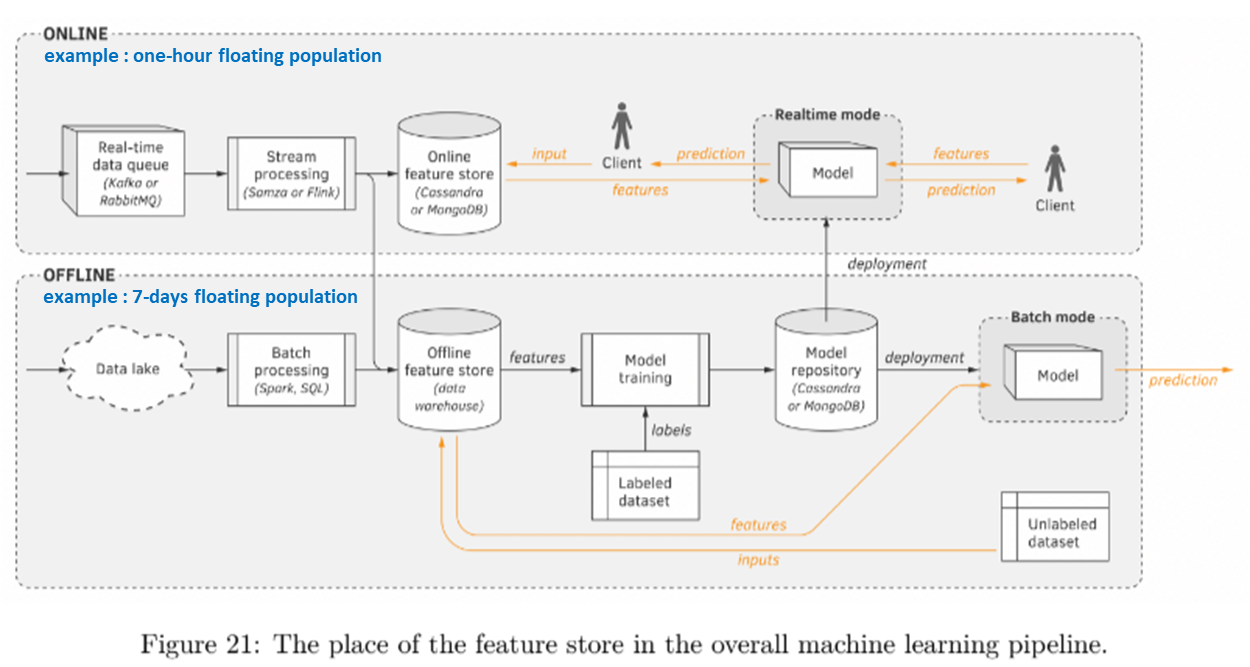

### **9. 특성 공학 모범 사례**

In [ ]:
1. 여러 가지 간단한 특성 생성
  - 모델링 과정을 시작할 때 날짜 데이터의 연,월,일,요일이나 수치형 데이터의 이동 평균 같은 가능한 한 많은
    '단순한' 특징을 설계한다. 왜냐하면 어떤 측정값을 다른 측정값과 결합할 때 그것이 예측에 유용할지는 미리
    알 수 없기 때문이다.

2. 기존 시스템 재사용
  - 머신러닝 기반이 아닌 알고리즘을 머신러닝 알고리즘으로 교체하는 경우, 기존 알고리즘의 출력을 새 모델의 특성으로
    사용할 수 있다. 이때 이전 알고리즘은 더 이상 변경되지 않도록 해야한다. 이전 알고리즘을 사용할 수 없는 경우에는
    이전 알고리즘의 입력값을 새 알고리즘의 입력값으로 사용한다.
    외부 시스템을 특성 소스로 사용할때는 그것의 동작을 제어할 수 있는 경우에만 사용해야 한다. 그렇지 않으면 시간이
    흐르며 시스템이 변경될 가능성이 있고 여러 원인들로 학습에 영향을 줄 수 있기 때문이다.

3. 필요한 경우에만 식별자(ID)를 특성으로 사용
  - 대부분의 경우 고유한 식별자는 일반화에 기여하지 않기 때문에 학습에 사용되지 않지만 특정 상황에서는 유용할 수 있다.
    예를 들어 특정 도시나 마을에 대한 적절한 구분을 위해 그 도시에 대한 식별자(ID)를 추가해 훈련할 수 있다.
    그러나 가능하면 샘플 식별자를 특성으로 사용하지 않도록 한다.

4. 가능하면 크기를 줄인다.
  - 해당 범주형 특징에 따라 모델이 다른 동작 '모드'를 갖는 경우에는 많은 범주값(12개 이상)이 있는 범주형 특징을 사용한다.
    예를 들면 부동산 가격 예측을 위한 우편번호나 글로벌 기업의 상품 판매량 예측을 위한 국가와 같은 것들이 이에 해당한다.
    반면 많은 범주값을 값는 범주형 특징이 있지만 여러 모드를 가지지 않는 경우에는 특징 해싱, 그룹화와 같은 방법을 통해
    세부 표현을 축소하는 것이 좋다. 다만 이 과정에서 발생할 수 있는 정보 손실을 주의깊게 살펴야 하는데, 한 범주형 특성은
    다른 범주형 특성과 기능적 종속성을 가지며 모델의 예측력이 이들이 조합에서 비롯되는 경우도 있기 때문이다.

5. 계수 사용은 신중하게
  - 계수 기반의 특성은 신중하게 사용해야 한다. 일부 계수는 시간이 지나도 어느 정도 한정된 범위내에서 유지되어 문제가
    되지 않겠지만 '가입 이후 통화 시간'과 같이 점점 늘어나는 특성의 경우, 모델이 훈련되었을 당시의 데이터와 달라져
    문제의 소지가 될 수 있다. 또한 빈(bin)으로 특성값을 그룹화할 때에도 문제가 발생할 수 있는데, 훈련 당시에는
    드물었던 데이터가 시간이 흐르면서 빈번해지는 경우가 생길 수도 있기 때문이다. 따라서 모델과 특성을 때때로 재평가
    하는 것이 모범 사례로 간주된다.

6. 특성은 필요할 때 선택(Feature selection)
  - 특성 선택은 다음과 같은 상황에서 수행하며, 보루타로 시작해볼 수 있다.
  1) 설명 가능한 모델이 필요(따라서 가장 중요한 예측 변수만 유지해야 할때)
  2) 메모리, 드라이브 공간처럼 하드웨어에 대한 요구사항이 엄격할 때.
  3) 운영 환경에서 모델을 실험하고 재구축하는데 시간과 자원이 부족할 때.
  4) 두 모델 훈련 간에 상당한 분포 이동이 예상될 때

7. 코드 테스트는 주의 깊게
  - 특성 공학 코드는 단위 테스트로 각 특성 추출기를 테스트해야 한다. Boolean형 특징이 제대로 참,거짓을 반환하는지,
    수치형 특성이 정상적인 값 범위에 있고 NaN,Null,의도하지 않은 0 값이 발생하진 않았는지 등을 잘 살펴야 한다.
    또한 운영 환경에 배포하고도 모델이 제대로 작동하는지 호환성도 검토해야 하며 특성값 분포가 동일하게 유지되도록
    고정된 테스트 데이터로 특성 추출기를 정기적으로 실행하는 것이 좋다.

8. 코드, 모델, 데이터의 동기화 상태 유지
  - 특성 공학 코드의 버전은 모델의 버전과 모델을 구축하는 데 사용한 데이터와 동기화되어야 한다. 이 세 가지는 동시에
    배포되어야 하고 문제가 발생하면 함께 롤백해야 한다. 모델이 운영 환경에 로드될 때마다 세 요소가 동기화되어 있는지
    (즉, 버전이 동일한지) 확인하는 것이 좋다.

9. 특성 추출 코드 분리
  - 특성 추출(공학) 코드는 모델의 나머지 코드로부터 독립되어 있어야 한다. 각 특성을 담당하는 코드는 다른 특성,
    데이터 처리 파이프라인이나 모델 호출 방식에 영향을 주지 않고 업데이트할 수 있어야 한다. 유일한 예외는 원-핫 인코딩
    과 Bow같이 많은 특성을 대량으로 생성하는 경우다.

10. 모델과 특성 추출기를 함께 직렬화
  - 가능하면 모델을 빌드할 때 사용한 모델과 특성 추출기 객체를 함께 직렬화(pickle 파일)한다. 운영 환경에서는 모두
    역직렬화해서 사용한다. 이것이 불가능하면 모델을 훈련시킬 때와 동일한 특성 추출 코드를 사용해 서빙한다.
    운영 환경에서 사용할 코드가 준비되면 이것을 사용해 모드를 재훈련하고, 코드가 변경되면 항상 모델을 재훈련해야 한다.

11. 특성값 기록
  - 운영 환경에서 기록된 특성 값이 훈련 데이터에서 관찰한 것과 동일한지 비교해보고 새로운 모델을 개발할 때
    훈련 데이터의 품질을 개선하기 위한 용도로 사용한다.